In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [7]:
data = pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Age

In [8]:
age = data[np.isfinite(data['age'])]['age']

Text(0, 0.5, 'Frequency')

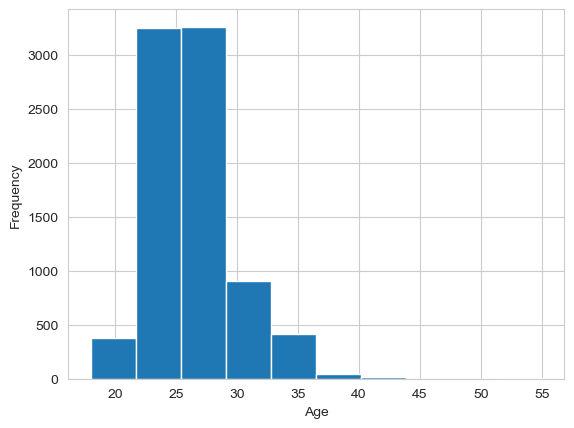

In [9]:
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

### people between 20-35 are the largest group with 22-27 being the most common age for being romantic/creepy

## Traits

In [17]:
atributes_gender = data[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interests']
atributes_gender.columns = cols

In [18]:
trace1 = go.Bar(
    y=list(atributes_gender.iloc[1]),
    x=atributes_gender.columns.values,
    name='Men',
    marker=dict(
        color='darkblue'
    )
)
trace2 = go.Bar(
    y=list(atributes_gender.iloc[0]),
    x=atributes_gender.columns.values,
    name='Women',
    marker=dict(
        color='pink'
    )
)

data1 = [trace1, trace2]
layout = go.Layout(
    title='What People Are Looking For in the Opposite Sex',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='barchart')

### Looks dominate as the most important trait in men while intelligence is the most import trait for women

In [19]:
atributes_gender_2 = data[['gender','attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].groupby('gender').mean()
atributes_gender_2.columns = cols

In [20]:
trace1 = go.Bar(
    y=list(atributes_gender_2.iloc[1]),
    x=atributes_gender.columns.values,
    name='Men',
    marker=dict(
        color='darkblue'
    )
)
trace2 = go.Bar(
    y=list(atributes_gender_2.iloc[0]),
    x=atributes_gender.columns.values,
    name='Women',
    marker=dict(
        color='pink'
    )
)

data2 = [trace1, trace2]
layout = go.Layout(
    title='What People Think the Opposite Sex is Looking For',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data2, layout=layout)
py.iplot(fig, filename='barchart')

### Women got it right for what men think is attractive in opposite sex

## How important is race and religion on a scale of 1-10

<Axes: title={'center': 'Race Importance'}, ylabel='count'>

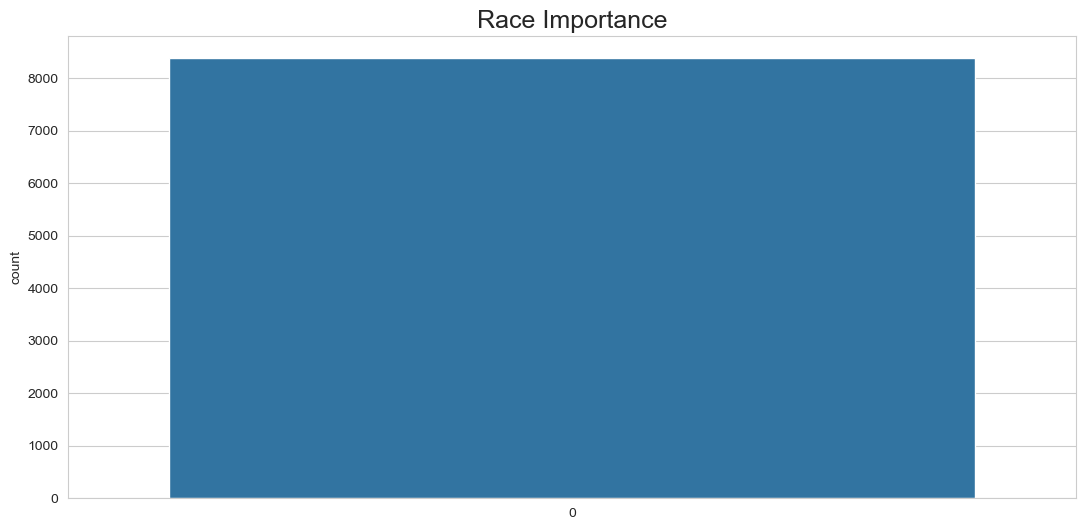

In [14]:
plt.figure(figsize=(13,6))
plt.title('Race Importance', fontsize=18)
sns.countplot(data['imprace'])

<Axes: title={'center': 'Religion Importance'}, ylabel='count'>

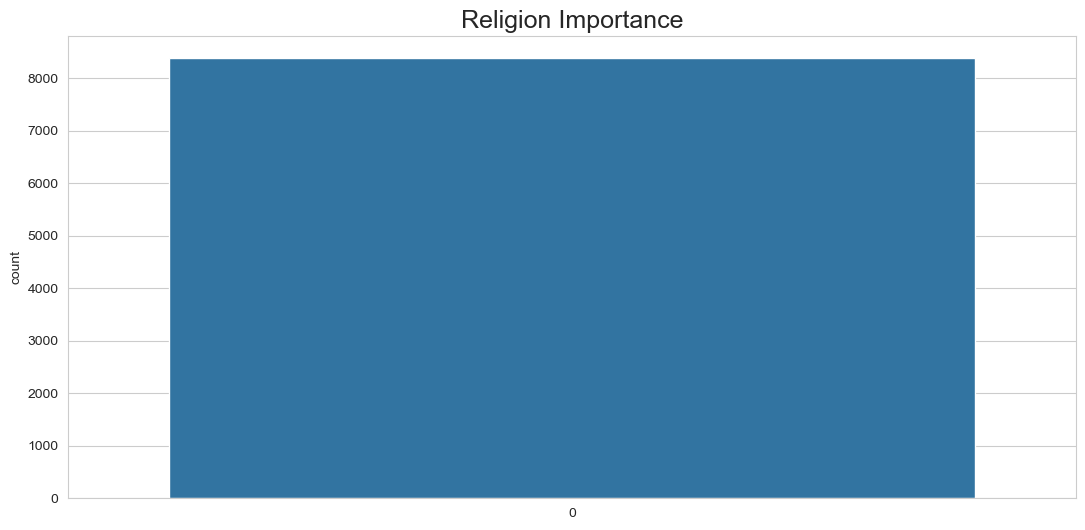

In [15]:
plt.figure(figsize=(13,6))
plt.title('Religion Importance', fontsize=18)
sns.countplot(data['imprelig'])

### It's pretty important after all.

## Activities interested by Men Vs Women

In [71]:
activities_interested=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
activities = data.groupby(['gender'])[activities_interested].mean()

In [78]:
activities_interested = ['Playing Sports','Watching Sports','Exercise','Dining','Museums','Art','Hiking','Gaming','Clubbing','Reading',
                       'Watching TV','Acting','Movies','Concerts','Music','Shopping','Yoga']

In [60]:
trace1 = go.Bar(
    x=activities_interested,
    y=activities.iloc[0],
    name='Women',
    #orientation = 'h',
    marker=dict(
        color='pink'
    )
)
trace2 = go.Bar(
    x=activities_interested,
    y=activities.iloc[1],
    name='Men',
    #orientation = 'h',
    marker=dict(
        color='darkblue'
    )
)

data3 = [trace1, trace2]
layout = go.Layout(
    title='% Interest in activities Men vs Women',
    font=dict(
        size=16
    ),
    # barmode = 'stack',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data3, layout=layout)
py.iplot(fig, filename='barchart')

In [75]:
activities.loc[2] = activities.loc[1] + activities.loc[0]
activities.loc[0] = activities.loc[0] / activities.loc[2]
activities.loc[1] = 1 - activities.loc[0]

In [76]:
activities

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
gender,,,,,,,,,,,,,,,,,
0,0.452636,0.455102,0.516319,0.523195,0.531480,0.537375,0.517756,0.425797,0.513310,0.514798,0.540770,0.551744,0.517472,0.520267,0.508768,0.576536,0.574465
1,0.547364,0.544898,0.483681,0.476805,0.468520,0.462625,0.482244,0.574203,0.486690,0.485202,0.459230,0.448256,0.482528,0.479733,0.491232,0.423464,0.425535
2,12.843281,9.146133,12.494033,15.571924,13.976758,13.435017,11.476560,7.755585,11.493793,15.359715,10.613376,13.560521,15.842526,13.654069,15.703759,11.272750,8.686033


In [79]:
trace1 = go.Bar(
    x=activities_interested,
    y=activities.iloc[0],
    name='Women',
    #orientation = 'h',
    marker=dict(
        color='pink'
    )
)
trace2 = go.Bar(
    x=activities_interested,
    y=activities.iloc[1],
    name='Men',
    #orientation = 'h',
    marker=dict(
        color='darkblue'
    )
)

data3 = [trace1, trace2]
layout = go.Layout(
    title='Proportional interest in activities Men vs Women',
    font=dict(
        size=16
    ),
    # barmode = 'stack',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data3, layout=layout)
py.iplot(fig, filename='barchart')